## Convolutional Neural Networks (CNN) for CIFAR-10 Dataset
Recognizing photos from the cifar-10 collection is one of the most common problems in the today’s world of machine learning. This tutorial is going to show you – step by step – how to build multi-layer artificial neural networks that will recognize images from a cifar-10 set and visualize it.

## Import Modules
First of all, we will be defining all of the classes and functions we will need:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

Using TensorFlow backend.


## Load CIFAR10 Dataset
The CIFAR-10 data set consists of 60000 32×32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

## Show Examples from Each Class
Running the code create a 5×2 plot of images and show examples from each class

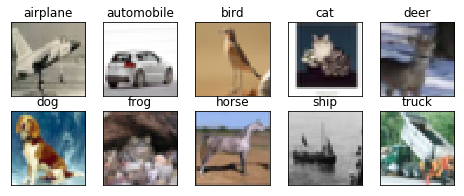

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::], (1, 2, 0))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

## Data pre-processing
The pixel values are in the range of 0 to 255 for each of the red, green and blue channels.

It is good practice to work with normalized data. Because the input values are well understood, we can easily normalize to the range 0 to 1 by dividing each value by the maximum observation which is 255.

Note, the data is loaded as integers, so we must cast it to floating point values in order to perform the division.

In [4]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

## Convolutional Neural Network for CIFAR-10 dataset
Let’s start off by defining a simple CNN structure as a baseline and evaluate how well it performs on the problem.

We will use a structure with two convolutional layers followed by max pooling and a flattening out of the network to fully connected layers to make predictions.

Our baseline network structure can be summarized as follows:

1.    Convolutional input layer, 32 feature maps with a size of 3×3, a rectifier activation function and a weight constraint of max norm set to 3.
2.    Convolutional layer, 32 feature maps with a size of 3×3, a rectifier activation function and a weight constraint of max norm set to 3.
3.    Max Pool layer with size 2×2.
4.    Flatten layer.
5.    Fully connected layer with 512 units and a rectifier activation function.
6.    Fully connected output layer with 10 units and a softmax activation function.

A logarithmic loss function is used with the stochastic gradient descent optimization algorithm configured with a large momentum and a learning rate of 0.001.

In [5]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 5
lrate = 0.001

sgd = SGD(lr=lrate, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 4,210,090
Trainable params: 4,210,090
Non-trainable params: 0
_________________________________________________________________


We can fit this model with 25 epochs and a batch size of 32.

A small number of epochs was chosen to help keep this tutorial moving. Normally the number of epochs would be one or two orders of magnitude larger for this problem.

Once the model is fit, we evaluate it on the test dataset and print out the classification accuracy.

In [6]:
# Fit the model
model.fit(train_features, train_labels, validation_data=(test_features, test_labels), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(test_features, test_labels, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 256s 5ms/step - loss: 1.8224 - acc: 0.3512 - val_loss: 1.5480 - val_acc: 0.4466
Epoch 2/5
50000/50000 [==============================] - 260s 5ms/step - loss: 1.4306 - acc: 0.4912 - val_loss: 1.3311 - val_acc: 0.5304
Epoch 3/5
50000/50000 [==============================] - 257s 5ms/step - loss: 1.2467 - acc: 0.5572 - val_loss: 1.1917 - val_acc: 0.5776
Epoch 4/5
50000/50000 [==============================] - 256s 5ms/step - loss: 1.1086 - acc: 0.6113 - val_loss: 1.1354 - val_acc: 0.5994
Epoch 5/5
50000/50000 [==============================] - 258s 5ms/step - loss: 0.9989 - acc: 0.6513 - val_loss: 1.0498 - val_acc: 0.6336
Accuracy: 63.36%


## Test the model with images
Randomly choose an image from the test data set, and visualize it. Use the trained network to predict which class does it belong to. Is it correct?

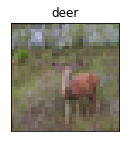

This image belongs to the class : deer


In [40]:
## randomly choose an image from the test set and visualize it
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
img_num = np.random.randint(X_test.shape[0])
im_test = np.transpose(X_test[img_num,::], (1, 2, 0))
plt.figure(figsize=(2,2))
plt.imshow(im_test)
plt.title(class_names[y_test[img_num][0]])
plt.xticks([])
plt.yticks([])
plt.show()

## predict the image label
pred_class = model.predict(test_features[img_num:img_num+1,::])
print("This image belongs to the class : {}".format(class_names[np.argmax(pred_class)]))

## Questions: 

(a) try to change the number of epochs or batch_size, does it improve the accuracy?

(b) change the number of filters or filter size in the CNN network, do you observe improvement?

(c) optional: design your own network and train it!

## Optional: Larger Convolutional Neural Network for CIFAR-10
We have seen that a simple CNN performs poorly on this complex problem. In this section we look at scaling up the size and complexity of our model.

Let’s design a deep version of the simple CNN above. We can introduce an additional round of convolutions with many more feature maps. We will use the same pattern of Convolutional, Dropout, Convolutional and Max Pooling layers.

This pattern will be repeated 3 times with 32, 64, and 128 feature maps. The effect be an increasing number of feature maps with a smaller and smaller size given the max pooling layers. Finally an additional and larger Dense layer will be used at the output end of the network in an attempt to better translate the large number feature maps to class values.

We can summarize a new network architecture as follows:

    1.Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
    2.Dropout layer at 20%.
    3.Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
    4.Max Pool layer with size 2×2.
    5.Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
    6.Dropout layer at 20%.
    7.Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
    8.Max Pool layer with size 2×2.
    9.Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function.
    10.Dropout layer at 20%.
    11.Convolutional layer,128 feature maps with a size of 3×3 and a rectifier activation function.
    12.Max Pool layer with size 2×2.
    13.Flatten layer.
    14.Dropout layer at 20%.
    15.Fully connected layer with 1024 units and a rectifier activation function.
    16.Dropout layer at 20%.
    17.Fully connected layer with 512 units and a rectifier activation function.
    18.Dropout layer at 20%.
    19.Fully connected output layer with 10 units and a softmax activation function.

We can very easily define this network topology in Keras, as follows:

In [10]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 5
lrate = 0.001

sgd = SGD(lr=lrate, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 16, 16)        18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 16, 16)        36928     
__________

We can fit and evaluate this model using the same a procedure above and the same number of epochs but a larger batch size of 64, found through some minor experimentation.

In [27]:
model.fit(train_features, train_labels, validation_data=(test_features, test_labels), epochs=25, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(test_features, test_labels, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 403s 8ms/step - loss: 1.9009 - acc: 0.2975 - val_loss: 1.5611 - val_acc: 0.4397
Accuracy: 43.97%


Question: how does the deeper model compare with the shallow one?